In [1]:
import pandas as pd
import numpy as np
from datascience import *
import matplotlib as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

## DATA

In [2]:
soccer = Table.read_table('CrowdstormingDataJuly1st.csv')
soccer.show(5)

playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177,72,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,0.25,0.5,1,1,GRC,0.326391,712,0.000564112,0.396,750,0.00269649
john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179,82,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40,0.0108749,-0.204082,49,0.0615044
abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181,79,nan,1,0,1,0,0,1,0,0,nan,nan,nan,3,3,ESP,0.369894,1785,0.00022949,0.588297,1897,0.00100165
pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191,87,Center Back,1,1,0,0,0,0,0,0,nan,nan,nan,3,3,ESP,0.369894,1785,0.00022949,0.588297,1897,0.00100165
ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172,70,Right Midfielder,1,1,0,0,0,0,0,0,nan,nan,nan,3,3,ESP,0.369894,1785,0.00022949,0.588297,1897,0.00100165


---
## Decision Point 1: Avg of both raters
--- 

In [3]:
avg_rate = (soccer.column('rater1') + soccer.column('rater2'))/2
soccer.append_column('avgRate', avg_rate)
soccer

playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,avgRate
lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177,72,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,0.25,0.5,1,1,GRC,0.326391,712,0.000564112,0.396,750,0.00269649,0.375
john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179,82,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40,0.0108749,-0.204082,49,0.0615044,0.75
abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181,79,nan,1,0,1,0,0,1,0,0,nan,nan,nan,3,3,ESP,0.369894,1785,0.00022949,0.588297,1897,0.00100165,nan
pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191,87,Center Back,1,1,0,0,0,0,0,0,nan,nan,nan,3,3,ESP,0.369894,1785,0.00022949,0.588297,1897,0.00100165,nan
ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172,70,Right Midfielder,1,1,0,0,0,0,0,0,nan,nan,nan,3,3,ESP,0.369894,1785,0.00022949,0.588297,1897,0.00100165,nan
aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182,71,Center Back,1,0,0,1,0,0,0,0,3868.jpg,0.25,0,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522,0.125
aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187,80,Left Fullback,1,1,0,0,0,0,0,0,47704.jpg,0,0.25,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522,0.125
alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180,68,Defensive Midfielder,1,0,0,1,0,0,0,0,22356.jpg,1,1,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522,1
anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193,80,Goalkeeper,1,0,1,0,0,0,0,0,16528.jpg,0.25,0.25,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522,0.25
andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180,70,Right Fullback,1,1,0,0,0,0,0,0,36499.jpg,0,0,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522,0


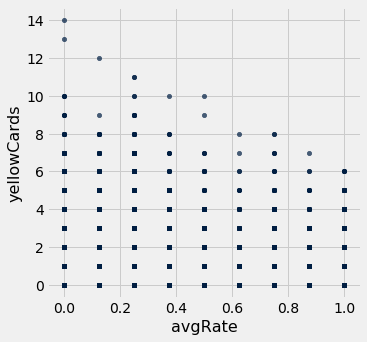

In [4]:
soccer.select('yellowCards', 'avgRate').scatter('avgRate')

At first glance, looking at the scatterplot gives the impression of a general trend that the higher the average rate the fewer the yellow cards. But, overplotting is occurring here where there could be many dots plotted on top of one another, so we can't see how many values there actually are.

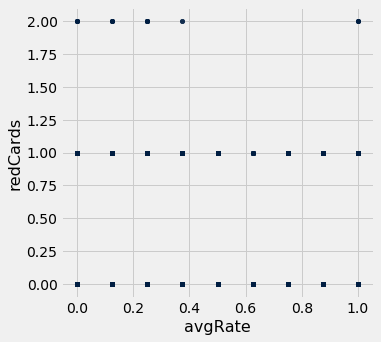

In [5]:
soccer.select('redCards', 'avgRate').scatter('avgRate')

The highest number of red cards anyone received was 2, and it is difficult to determine a relationship with the lack of variability here. We'll stick to modeling the yellow cards since there's more variability and a more visible trend.

---
## Decision Point 2:  Look at only yellow cards
---

Also removed players with nan values for avgRate in the table below.

In [6]:
yellow = soccer.where('avgRate', are.between_or_equal_to(0, 1))
yellow.show(5)-

playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,avgRate
lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177,72,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,0.25,0.5,1,1,GRC,0.326391,712,0.000564112,0.396,750,0.00269649,0.375
john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179,82,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40,0.0108749,-0.204082,49,0.0615044,0.75
aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182,71,Center Back,1,0,0,1,0,0,0,0,3868.jpg,0.25,0,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522,0.125
aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187,80,Left Fullback,1,1,0,0,0,0,0,0,47704.jpg,0,0.25,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522,0.125
alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180,68,Defensive Midfielder,1,0,0,1,0,0,0,0,22356.jpg,1,1,4,4,LUX,0.325185,127,0.00329681,0.538462,130,0.0137522,1


Calcualte number of yellow cards per game

In [7]:
yellow_per_game = yellow.column('yellowCards')/yellow.column('games')
yellow.append_column('yellowPerGame', yellow_per_game)
yellow.select('player', 'avgRate', 'yellowPerGame').show(3)

player,avgRate,yellowPerGame
Lucas Wilchez,0.375,0
John Utaka,0.75,1
Aaron Hughes,0.125,0


Let's look at the relationship between yellow per game and rating

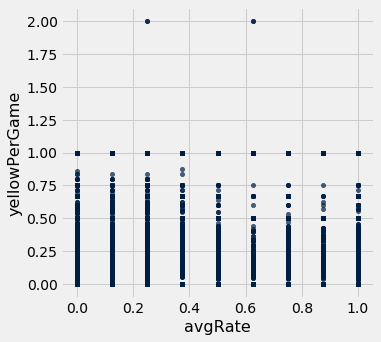

In [8]:
yellow.select('avgRate', 'yellowPerGame').scatter('avgRate')

## Your turn!

On this section of the notebook you will also have to face the difficult decision that data scientists face when they build their models. In a way, the descions we take such as :
* picking a dataset
* picking certain variables while discarding others
* creating new metrics
* handeling outliers 
* chosing one model over another 
all have an incredible impact over the final results. 

On this section of the notebook, you will each pick your own adventure! 
You will encounter 5 initial "decision points" in which you will have to choose between to option (a) or (b). At the end of this excercise the answers that you get should be different (for the most part)  than the ones that your peers choose. 

You can look at the EDA notebook you completed last week to get inspired! 

## Phrasing: Explain why we are giving these two variables to look at

* a.) 
Keilyn: 
* weight: heavier players may be slower, and thus more prone to physical play to slow down their faster competitors (http://thomasswan.hubpages.com/hub/Top-10-Most-Red-Cards-Premier-League) / position: Some positions may have more opportuntity for physical play than others / games: More games played = more opportunities for red cards
* position (line 21: Positions that require more cardable activities would get carded more independent of skin tone ( Position - Team 11, Team 19, 20, 28) 
* ine 22: We controlled for numbers of games because encountering a referee more time increases the likelihood of receiving a red card.

Lisa
* BMI (physical stature) - Team 9
* Age - Team 9, 11, 20, 24
* Avg winning/losing rate - Team 9
* Total red+yellow cards(allreds) - Team 24


Analytical Approaches Spreadsheet : https://docs.google.com/spreadsheets/d/14-3MsAHLbG7CGdbAaLC-SZaM31ax7ilZRhzvi19hwAo/edit#gid=1869864511

## Decision Point 1 : Weight vs BMI

In [9]:
# bmi = weight(kg)/height^2(m^2)
bmi = soccer.column('weight')/(soccer.column('height') ** 2)
soccer_bmi = soccer.append_column('bmi',bmi)
soccer.show(5)

playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,avgRate,bmi
lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177,72,Attacking Midfielder,1,0,0,1,0,0,0,0,95212.jpg,0.25,0.5,1,1,GRC,0.326391,712,0.000564112,0.396,750,0.00269649,0.375,0.00229819
john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179,82,Right Winger,1,0,0,1,0,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40,0.0108749,-0.204082,49,0.0615044,0.75,0.00255922
abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181,79,nan,1,0,1,0,0,1,0,0,nan,nan,nan,3,3,ESP,0.369894,1785,0.00022949,0.588297,1897,0.00100165,nan,0.0024114
pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191,87,Center Back,1,1,0,0,0,0,0,0,nan,nan,nan,3,3,ESP,0.369894,1785,0.00022949,0.588297,1897,0.00100165,nan,0.0023848
ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172,70,Right Midfielder,1,1,0,0,0,0,0,0,nan,nan,nan,3,3,ESP,0.369894,1785,0.00022949,0.588297,1897,0.00100165,nan,0.00236614


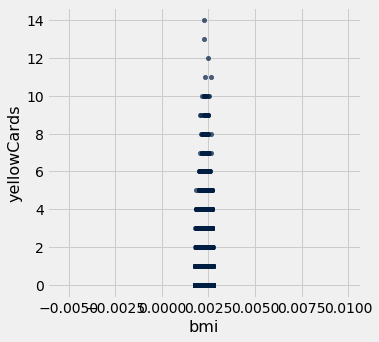

In [10]:
soccer.select('yellowCards', 'bmi').scatter('bmi')

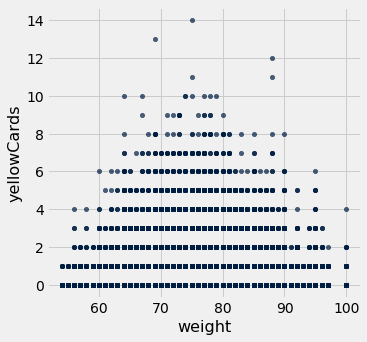

In [11]:
soccer.select('yellowCards', 'weight').scatter('weight')

## Decision Point 2 : Position

In [12]:
soccer.group('position', sum).select('position','yellowCards sum', 'yellowReds sum','redCards sum').show()

position,yellowCards sum,yellowReds sum,redCards sum
Attacking Midfielder,4174,89,93
Center Back,10663,396,445
Center Forward,5550,144,196
Center Midfielder,2778,79,76
Defensive Midfielder,8991,291,200
Goalkeeper,1624,13,156
Left Fullback,4283,135,136
Left Midfielder,2571,87,78
Left Winger,1683,38,39
Right Fullback,4641,157,107


## Decision Point 3 : Avg winning/losing rate 

In [13]:
grouped = soccer.group('player', sum)
avg_winning = grouped.column('victories sum')/grouped.column('games sum')
grouped.append_column('avg_winning', avg_winning)
grouped

player,playerShort sum,club sum,leagueCountry sum,birthday sum,height sum,weight sum,position sum,games sum,victories sum,ties sum,defeats sum,goals sum,yellowCards sum,yellowReds sum,redCards sum,photoID sum,rater1 sum,rater2 sum,refNum sum,refCountry sum,Alpha_3 sum,meanIAT sum,nIAT sum,seIAT sum,meanExp sum,nExp sum,seExp sum,avgRate sum,bmi sum,avg_winning
Abdón Prats,,,,,5973,2607,,36,14,7,15,9,6,0,0,,nan,nan,43581,99,,12.2065,58905,0.00757316,19.4138,62601,0.0330544,nan,0.0795763,0.388889
Adriano,,,,,18576,7236,,373,229,59,85,33,58,1,3,,27,27,161137,3454,,38.7102,2.58371e+06,0.0636654,61.7244,2.66526e+06,0.322261,27,0.244592,0.613941
Adrián,,,,,21002,8574,,323,155,73,95,60,19,0,0,,28.5,7,144238,2457,,41.0631,2.61548e+06,0.0417523,60.9874,2.70057e+06,0.223019,17.75,0.252426,0.479876
Adrián Colunga,,,,,8037,3243,,178,53,43,82,39,22,1,0,,11.75,11.75,50457,420,,17.1869,87911,0.0129479,27.1187,92973,0.0568352,11.75,0.110906,0.297753
Aduriz,,,,,11466,4914,,322,125,82,115,105,68,3,4,,15.75,15.75,84905,1236,,22.9109,305901,0.015627,35.6882,321422,0.0696234,15.75,0.148352,0.388199
Adán,,,,,5890,2728,,44,22,6,16,0,1,0,1,,0,0,43068,792,,11.4447,105304,0.0188239,18.0993,110781,0.119806,0,0.0755679,0.5
Agirretxe,,,,,8415,3465,,200,78,62,60,52,8,0,0,,0,0,55651,451,,16.6856,84419,0.0112912,27.4744,89444,0.0507533,0,0.0990878,0.39
Albelda,,,,,26607,11319,,561,292,139,130,11,197,3,6,,36.75,36.75,208181,4490,,52.4451,744209,0.0777899,77.348,779381,0.35862,36.75,0.345502,0.520499
Alberto Botía,,,,,8370,3690,,171,51,50,70,4,69,0,3,,0,11.25,56243,936,,16.2807,224617,0.0157181,24.8241,236052,0.0774384,5.625,0.10666,0.298246
Alberto Perea,,,,,1947,748,,17,5,3,9,1,1,0,0,,2.75,2.75,8694,33,,4.06883,19635,0.00252439,6.47127,20867,0.0110181,2.75,0.0238756,0.294118


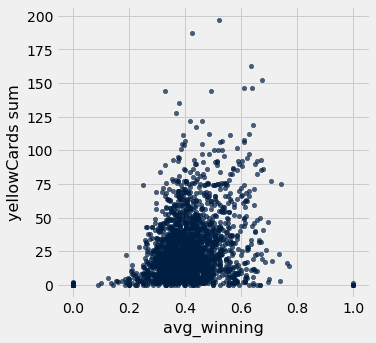

In [14]:
grouped.scatter('avg_winning', 'yellowCards sum')

## Decision Point 4 : Avg goals/game

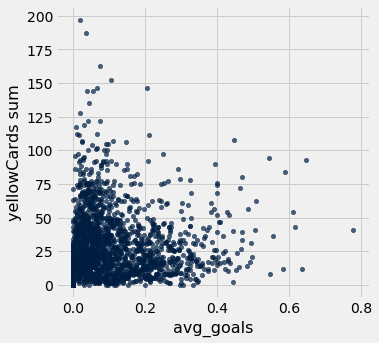

In [15]:
avg_goals = grouped.column('goals sum')/grouped.column('games sum')
grouped.append_column('avg_goals', avg_goals)
grouped.scatter('avg_goals', 'yellowCards sum')

## Decision Point 5 : Age

In [24]:
birthday = soccer.column('birthday')
birthday

array(['31.08.1983', '08.01.1982', '17.12.1992', ..., '10.10.1991',
       '12.07.1990', '14.12.1978'], dtype='<U10')